In [73]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [74]:
data= pd.read_csv("C:/Users\HP/Downloads/diabetes.csv")

In [75]:
data.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
data.head(10)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [78]:
data.isnull().sum()

Number of times pregnant                                                    0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    0
Diastolic blood pressure (mm Hg)                                            0
Triceps skin fold thickness (mm)                                            0
2-Hour serum insulin (mu U/ml)                                              0
Body mass index (weight in kg/(height in m)^2)                              0
Diabetes pedigree function                                                  0
Age (years)                                                                 0
Class variable                                                              0
dtype: int64

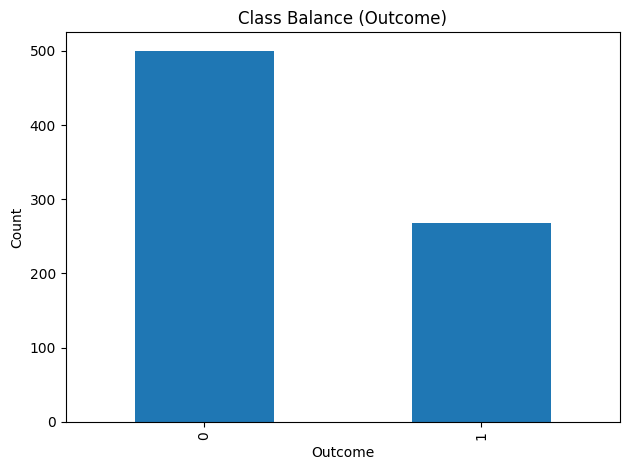

In [79]:
# 1) Class balance

plt.figure()
data["Class variable"].value_counts().sort_index().plot(kind="bar")
plt.title("Class Balance (Outcome)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [80]:
print("Count of 1'S =",(data["Class variable"] == 1).sum())


Count of 1'S = 268


In [81]:
print("Count Of 0's =",(data["Class variable"] == 0).sum())


Count Of 0's = 500


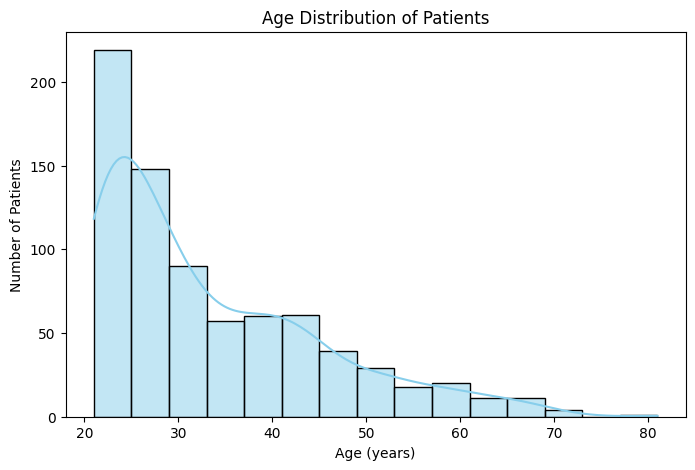

In [82]:
# Plot Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data["Age (years)"], bins=15, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age (years)")
plt.ylabel("Number of Patients")
plt.show()

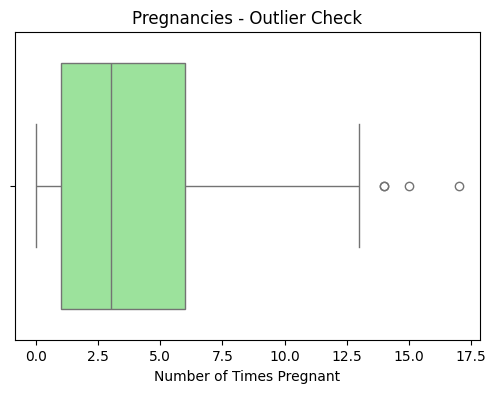


Outlier rows:
      Number of times pregnant  \
88                         15   
159                        17   
298                        14   
455                        14   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
88                                                 136                          
159                                                163                          
298                                                100                          
455                                                175                          

     Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
88                                 70                                32   
159                                72                                41   
298                                78                                25   
455                                62                                30   

     2-Hour serum insulin (mu U/ml) 

In [83]:

# 2. Boxplot to visualize outliers ---
plt.figure(figsize=(6,4))
sns.boxplot(x=data["Number of times pregnant"], color="lightgreen")
plt.title("Pregnancies - Outlier Check")
plt.xlabel("Number of Times Pregnant")
plt.show()

# 3. Identify outlier values using IQR ---
Q1 = data["Number of times pregnant"].quantile(0.25)
Q3 = data["Number of times pregnant"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["Number of times pregnant"] < lower_bound) | (data["Number of times pregnant"] > upper_bound)]
print("\nOutlier rows:\n", outliers)

In [84]:
# Get max value
max_pregnancies = data["Number of times pregnant"].max()

print("Maximum number of times pregnant:", max_pregnancies)

Maximum number of times pregnant: 17


In [85]:
# Get min value
max_pregnancies = data["Number of times pregnant"].min()

print("minmum number of times pregnant:", max_pregnancies)

minmum number of times pregnant: 0


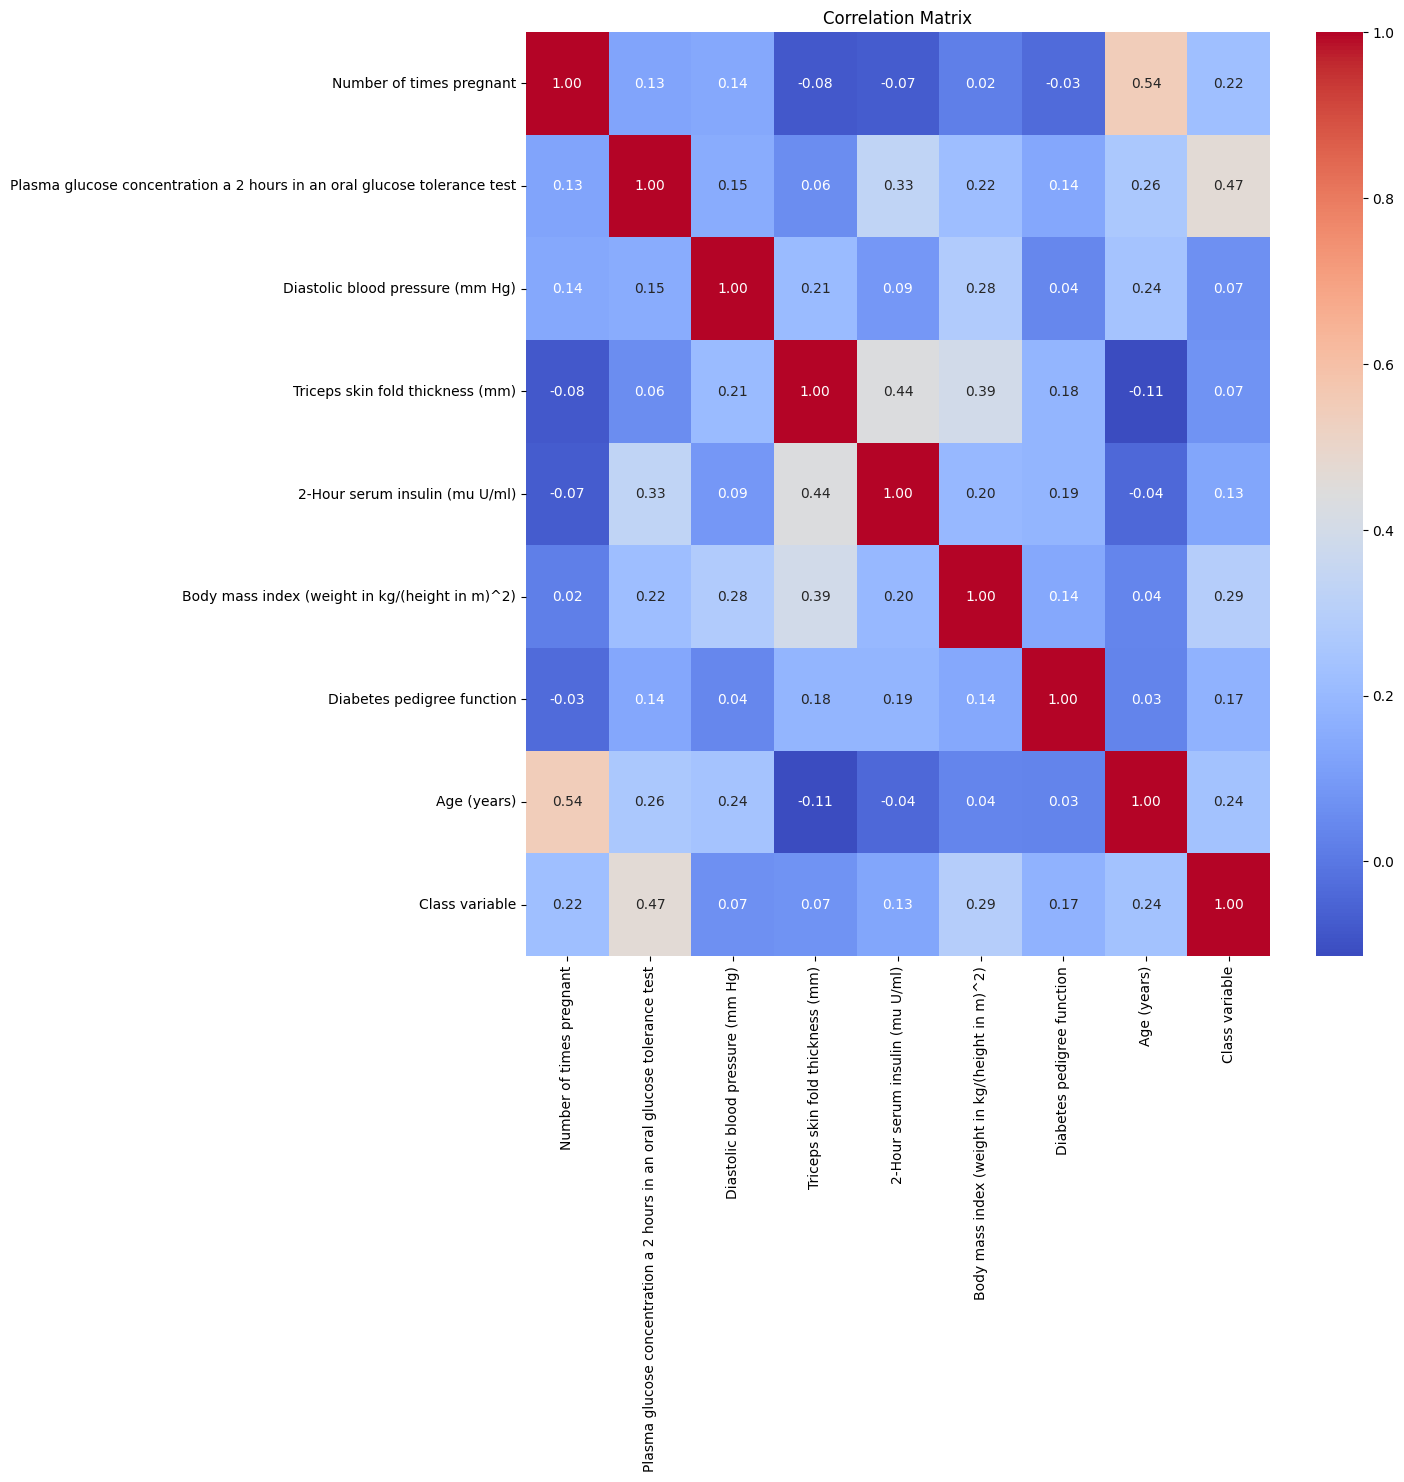

In [86]:
# Compute correlation (numeric columns only)
corr = data.corr(numeric_only=True)

# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [87]:
# Columns to check
cols_with_zeros = [
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)"
]

# Count zeros in each column
for col in cols_with_zeros:
    zero_count = (data[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")


Plasma glucose concentration a 2 hours in an oral glucose tolerance test: 5 zeros
Diastolic blood pressure (mm Hg): 35 zeros
Triceps skin fold thickness (mm): 227 zeros
2-Hour serum insulin (mu U/ml): 374 zeros
Body mass index (weight in kg/(height in m)^2): 11 zeros


In [88]:
cols_with_zeros = [
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)"
]

data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)


In [89]:
# Columns to check
cols_with_zeros = [
    "Plasma glucose concentration a 2 hours in an oral glucose tolerance test",
    "Diastolic blood pressure (mm Hg)",
    "Triceps skin fold thickness (mm)",
    "2-Hour serum insulin (mu U/ml)",
    "Body mass index (weight in kg/(height in m)^2)"
]

# Count zeros in each column
for col in cols_with_zeros:
    zero_count = (data[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")


Plasma glucose concentration a 2 hours in an oral glucose tolerance test: 0 zeros
Diastolic blood pressure (mm Hg): 0 zeros
Triceps skin fold thickness (mm): 0 zeros
2-Hour serum insulin (mu U/ml): 0 zeros
Body mass index (weight in kg/(height in m)^2): 0 zeros


In [90]:
print(data["Class variable"].unique())
print(data["Class variable"].dtype)
# there is no need to uncode the outcome

[1 0]
int64


In [91]:

# Define X and y 
TARGET_COL = "Class variable"
X = data.drop(columns=[TARGET_COL])
y = data[TARGET_COL].astype(int)

In [92]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

In [93]:
print(f"\nTrain size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")



Train size: 614 | Test size: 154


In [94]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

def make_smote_pipeline(clf):
    return ImbPipeline([
        ("imputer", SimpleImputer(strategy="median")),                 # 1) impute
        ("smote", SMOTE(random_state=42, k_neighbors=5)),    # 2) oversample
        ("scaler", StandardScaler()),                                  # 3) scale
        ("clf", clf)                                                   # 4) model
    ])


In [ ]:
clf = SVC(probability=True, random_state=42)
param_grid = {
    "clf__kernel": ["linear", "rbf"],
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__gamma": ["scale", 0.01, 0.1, 1]  
}

pipe = make_smote_pipeline(clf)
gs_svm = GridSearchCV(pipe, param_grid, scoring="f1", cv=cv, n_jobs=-1)
gs_svm.fit(X_train, y_train)
best_svm = gs_svm.best_estimator_

y_pred = best_svm.predict(X_test)
print("SVM — Best Params:", gs_svm.best_params_)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1:        {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("-"*50)


SVM — Best Params: {'clf__C': 1, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Accuracy:  0.7662
Precision: 0.6500
Recall:    0.7222
F1:        0.6842
--------------------------------------------------


In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)
param_grid = {
    "clf__max_depth": [None, 5, 8, 12, 16],
    "clf__min_samples_split": [2, 5, 10, 20],
    "clf__min_samples_leaf": [1, 2, 4, 8]
}

pipe = make_smote_pipeline(clf)
gs_dt = GridSearchCV(pipe, param_grid, scoring="f1", cv=cv, n_jobs=-1)
gs_dt.fit(X_train, y_train)
best_dt = gs_dt.best_estimator_

y_pred = best_dt.predict(X_test)
print("Decision Tree — Best Params:", gs_dt.best_params_)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1:        {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("-"*50)


Decision Tree — Best Params: {'clf__max_depth': 5, 'clf__min_samples_leaf': 8, 'clf__min_samples_split': 20}
Accuracy:  0.7597
Precision: 0.6308
Recall:    0.7593
F1:        0.6891
--------------------------------------------------


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state=42)
param_grid = {
    "clf__n_estimators": [200, 400, 600],
    "clf__max_depth": [None, 8, 12, 16],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2"]
}

pipe = make_smote_pipeline(clf)
gs_rf = GridSearchCV(pipe, param_grid, scoring="f1", cv=cv, n_jobs=-1)
gs_rf.fit(X_train, y_train)
best_rf = gs_rf.best_estimator_

y_pred = best_rf.predict(X_test)
print("Random Forest — Best Params:", gs_rf.best_params_)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1:        {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("-"*50)


Random Forest — Best Params: {'clf__max_depth': 8, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 400}
Accuracy:  0.7468
Precision: 0.6190
Recall:    0.7222
F1:        0.6667
--------------------------------------------------


In [98]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

clf = XGBClassifier(
    random_state=42, eval_metric="logloss",
    n_estimators=400, tree_method="hist", use_label_encoder=False
)
param_grid = {
    "clf__max_depth": [3, 5, 7],
    "clf__learning_rate": [0.03, 0.1, 0.2],
    "clf__subsample": [0.7, 0.9, 1.0],
    "clf__colsample_bytree": [0.7, 0.9, 1.0]
}

pipe = make_smote_pipeline(clf)
gs_xgb = GridSearchCV(pipe, param_grid, scoring="f1", cv=cv, n_jobs=-1)
gs_xgb.fit(X_train, y_train)
best_xgb = gs_xgb.best_estimator_

y_pred = best_xgb.predict(X_test)
print("XGBoost — Best Params:", gs_xgb.best_params_)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1:        {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("-"*50)


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [05:27:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost — Best Params: {'clf__colsample_bytree': 0.9, 'clf__learning_rate': 0.03, 'clf__max_depth': 3, 'clf__subsample': 0.7}
Accuracy:  0.7468
Precision: 0.6271
Recall:    0.6852
F1:        0.6549
--------------------------------------------------


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier()
param_grid = {
    "clf__n_neighbors": [3, 5, 7, 9, 11, 15],
    "clf__weights": ["uniform", "distance"],
    "clf__p": [1, 2]  
}

pipe = make_smote_pipeline(clf)
gs_knn = GridSearchCV(pipe, param_grid, scoring="f1", cv=cv, n_jobs=-1)
gs_knn.fit(X_train, y_train)
best_knn = gs_knn.best_estimator_

y_pred = best_knn.predict(X_test)
print("k-NN — Best Params:", gs_knn.best_params_)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1:        {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("-"*50)
 

k-NN — Best Params: {'clf__n_neighbors': 11, 'clf__p': 2, 'clf__weights': 'distance'}
Accuracy:  0.7208
Precision: 0.5753
Recall:    0.7778
F1:        0.6614
--------------------------------------------------


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression(max_iter=2000, random_state=42)
param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"]
}

pipe = make_smote_pipeline(clf)  
gs_logreg = GridSearchCV(pipe, param_grid, scoring="f1", cv=cv, n_jobs=-1)
gs_logreg.fit(X_train, y_train)
best_logreg = gs_logreg.best_estimator_

y_pred = best_logreg.predict(X_test)
print("Logistic Regression — Best Params:", gs_logreg.best_params_)
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1:        {f1_score(y_test, y_pred, zero_division=0):.4f}")
print("-"*50)


Logistic Regression — Best Params: {'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Accuracy:  0.7078
Precision: 0.5714
Recall:    0.6667
F1:        0.6154
--------------------------------------------------


In [102]:
models = {
    "Logistic Regression": best_logreg,
    "SVM": best_svm,
    "Decision Tree": best_dt,
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "k-NN": best_knn
}

from sklearn.metrics import precision_score, recall_score, f1_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1
    })
    
pd.DataFrame(results).sort_values(by="Recall", ascending=False)


,Model,Accuracy,Precision,Recall,F1
5,k-NN,0.720779,0.575342,0.777778,0.661417
2,Decision Tree,0.759740,0.630769,0.759259,0.689076
3,Random Forest,0.746753,0.619048,0.722222,0.666667
1,SVM,0.766234,0.650000,0.722222,0.684211
4,XGBoost,0.746753,0.627119,0.685185,0.654867
0,Logistic Regression,0.707792,0.571429,0.666667,0.615385


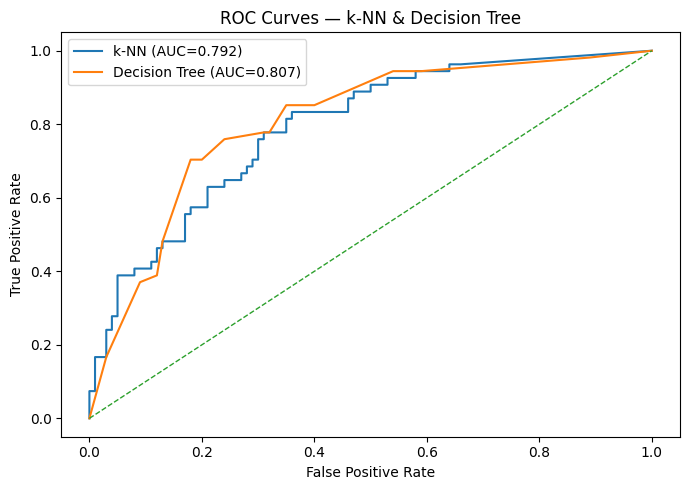

In [104]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

selected = {
    "k-NN": models["k-NN"],
    "Decision Tree": models["Decision Tree"]
}

plt.figure(figsize=(7,5))
for name, model in selected.items():
    probs = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, probs)
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], "--", linewidth=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves — k-NN & Decision Tree")
plt.legend(); plt.tight_layout(); plt.show()


##### In conclusion
Decision Tree and k-NN emerged as the top performers, both achieving high recall (>0.75) and strong ROC-AUC (~0.81, ~0.80), meaning they reliably identify diabetic patients.